![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
ls -l '/gdrive/My Drive/AIML/Sequential_NLP_Project1/'

total 270651
-rw------- 1 root root     62325 Jul 31 09:22 'Description - Project 2 - Sequential Models in NLP - Sarcasm Detection.pdf'
-rw------- 1 root root 271396933 Aug  2 13:02  glove.6B.200d.zip
-rw------- 1 root root      6507 Jul 31 09:27 'Questions - Project 2 - Sequential Models in NLP - Sarcasm Detection.ipynb'
-rw------- 1 root root   5616830 Aug  1 13:48  Sarcasm_Headlines_Dataset.json
-rw------- 1 root root     62817 Aug  3 11:12 'Solutions_Project 2 - Sequential Models in NLP - Sarcasm Detection.ipynb'


In [4]:
data = pd.read_json('/gdrive/My Drive/AIML/Sequential_NLP_Project1/Sarcasm_Headlines_Dataset.json', lines=True)

In [5]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
print(data.shape)

(26709, 3)


In [7]:
print(data.columns)

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')


In [8]:
data.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


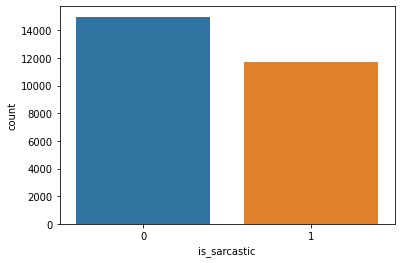

In [81]:
# countplot showing value counts of Sarcastic and Non-Sarcastic headlines
ax = sns.countplot('is_sarcastic', data=data)

 - The number of negative sentiments are slightly more than number of positive sentiments

### Drop `article_link` from dataset (3 Marks)

In [10]:
data = data.drop('article_link', axis=1)

In [11]:
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [12]:
data['headline_length'] = data['headline'].apply(lambda x: len(x.split()))

In [88]:
# Minimum and Maximum headline length
print('Minimum headline length =', data['headline_length'].min())
print('Maximum headline length =', data['headline_length'].max())

Minimum headline length = 2
Maximum headline length = 39


In [13]:
data.head()

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


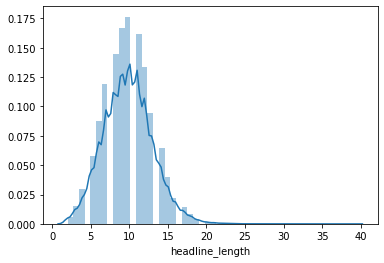

In [89]:
#distplot showing disribution of headline lengths
ax = sns.distplot(data['headline_length'])

 - The headline length of all headlines in the dataset is normally distributed with long right tail indicating outliers, most of the headline lengths are between 2 and 20

In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['headline'],
                                                    data['is_sarcastic'], test_size=0.3, random_state=1)

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18696,) (18696,)
(8013,) (8013,)


In [16]:
X_train.head(3)

21906       don king enjoys grandilomentitudinous sandwich
24781    vital info on iraqi chemical weapons provided ...
22552    hacker releases new 'orange is the new black' ...
Name: headline, dtype: object

In [17]:
y_train.head(3)

21906    1
24781    1
22552    0
Name: is_sarcastic, dtype: int64

In [18]:
X_test.head(3)

21661    r.e.m.'s children still hoping parents will ge...
6023                                     what wealth isn't
15345    7+ reasons why bisexual, pansexual, fluid, and...
Name: headline, dtype: object

In [19]:
y_test.head(3)

21661    1
6023     0
15345    0
Name: is_sarcastic, dtype: int64

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [20]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [21]:
# Import tensorflow
import tensorflow as tf

In [22]:
# using Tokenizer class create a Vocabulary with unique words of size max_features (max_features=10000)
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)

In [23]:
# fit the tokenizer on X_train
tokenizer.fit_on_texts(X_train.tolist())

In [24]:
# get word_indices of all the unique words
word_indices = tokenizer.word_index

In [25]:
print(len(word_indices))

24845


In [26]:
# using text_to_sequences method replace the words in X_train with their equivalent word indices 
X_train = tokenizer.texts_to_sequences(X_train.tolist())

In [27]:
X_train[0:2]

[[3579, 481, 1858, 1569],
 [6496, 4001, 7, 1985, 2660, 1570, 18, 49, 52, 324, 25, 201, 215]]

In [28]:
# replace the words in X_test with their equivalent word indices 
X_test = tokenizer.texts_to_sequences(X_test.tolist())

In [29]:
X_test[0:2]

[[1815, 952, 1285, 3133, 295, 72, 897, 157, 35, 64, 81, 567], [32, 4604, 654]]

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [31]:
# Pad X_train and X_test with maximum headline length (maxlen = 25)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='pre')

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='pre')

In [32]:
# check class type of X_train and X_test, both should be numpy array
print(type(X_train), type(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [33]:
# convert y_train and y_test to numpy array
y_train = np.array(y_train)
y_test =  np.array(y_test)
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Vocab mapping
- There is no word for 0th index

In [34]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'after': 20,
 'out': 21,
 'be': 22,
 'up': 23,
 'how': 24,
 'that': 25,
 'it': 26,
 'as': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'all': 33,
 'just': 34,
 'will': 35,
 'has': 36,
 'he': 37,
 'more': 38,
 'who': 39,
 'into': 40,
 'why': 41,
 'one': 42,
 'report': 43,
 'over': 44,
 'year': 45,
 'donald': 46,
 'have': 47,
 'area': 48,
 'u': 49,
 'can': 50,
 'first': 51,
 's': 52,
 'says': 53,
 'day': 54,
 'woman': 55,
 'time': 56,
 'her': 57,
 'like': 58,
 'off': 59,
 'obama': 60,
 'old': 61,
 'no': 62,
 "trump's": 63,
 'get': 64,
 'life': 65,
 'people': 66,
 'an': 67,
 'make': 68,
 'women': 69,
 'now': 70,
 "'": 71,
 'still': 72,
 'house': 73,
 'was': 74,
 'than': 75,
 'i': 76,
 '5': 77,
 'white': 78,
 'when': 79,
 'my': 80,
 'back': 81,
 'world':

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [35]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

24846


### Load Glove Word Embeddings (3 Marks)

In [36]:
# upload the required glove embedding file - glove.6B.200d.txt
!cp '/gdrive/My Drive/AIML/Sequential_NLP_Project1/glove.6B.200d.zip' './'
!ls -lrt  './'

total 265044
drwxr-xr-x 1 root root      4096 Jul 30 16:30 sample_data
-rw------- 1 root root 271396933 Aug  3 11:14 glove.6B.200d.zip


In [37]:
# use  zipfile module to extract file contents
from zipfile import ZipFile

# opening the zip file in READ mode 
with ZipFile('./glove.6B.200d.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall()


File Name                                             Modified             Size
glove.6B.200d.txt                              2020-08-02 18:00:36    693432828
Extracting all the files now...


### Create embedding matrix

In [38]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
count=0
for o in open(EMBEDDING_FILE):
  #print(o)

  # word contains each word in the glove embedding file
  word = o.split(" ")[0]
  #print(word)

  # All the cooccurence values  or embedding values for each word is stored in embd list
  embd = o.split(" ")[1:]

  # strip the newline character present in the last co-occurence value
  embd[-1] = embd[-1].rstrip('\n')

  # convert the embd list to np array of type float32 to be used for model building
  embd = np.asarray(embd, dtype='float32')
  #print(embd)
    
  embeddings[word] = embd
  #count+=1
  #if count == 10: break

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [116]:
# clear session to remove model from previous session
tf.keras.backend.clear_session()

# Initialize sequential model
model = tf.keras.models.Sequential()

In [117]:
# Add Embedding Layer with - 
# input_dim as No of words in Vocabulary or size of word_index (num_words=24846),
# input_length as max headline length (maxlen=25),
# output_dim as embedding size (embedding_size=200)
# weights as weights in embedding_matrix
# Do not train the Embedding layer as we ar using already trained weights from glove model 
model.add(tf.keras.layers.Embedding(input_dim=num_words, 
                                    input_length=maxlen, 
                                    output_dim=embedding_size, 
                                    weights=[embedding_matrix], 
                                    trainable=False))

In [118]:
model.output_shape

(None, 25, 200)

In [119]:
# Add Bidirectional LSTM layer with 50% dropout snd recuurrent_droupout
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(units=256, 
                         dropout=0.50, 
                         recurrent_dropout=0.50, 
                         return_sequences=True)))

In [120]:
model.output_shape

(None, 25, 512)

In [121]:
# Add Global MaxPool layer
model.add(tf.keras.layers.GlobalMaxPool1D())

In [122]:
model.output_shape

(None, 512)

In [123]:
# Add Dense layer with relu as activation
model.add(tf.keras.layers.Dense(units= 128, activation='relu'))

In [124]:
model.output_shape

(None, 128)

In [125]:
# Add Dropout layer with 50% dropout
model.add(tf.keras.layers.Dropout(0.50))

In [126]:
model.output_shape

(None, 128)

In [127]:
# Add Output layer with sigmoid as activation
model.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

In [128]:
model.output_shape

(None, 1)

### Compile the model (3 Marks)

In [129]:
# callback code to reduce loss on Plateau
rlrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

In [130]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [131]:
#Fit the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           4969200   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 512)           935936    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,970,929
Trainable params: 1,001,729
Non-trainable params: 4,969,200
______________________________________

### Fit the model (4 Marks)

In [132]:
# Fit the model
model_history = model.fit(X_train, y_train, 
                          batch_size = 128 , 
                          validation_data = (X_test,y_test) , 
                          epochs = 10, callbacks = [rlrp])

Epoch 1/10
147/147 [==============================] - 43s 294ms/step - loss: 0.5693 - acc: 0.6989 - val_loss: 0.4797 - val_acc: 0.7609 - lr: 0.0010
Epoch 2/10
147/147 [==============================] - 42s 286ms/step - loss: 0.4510 - acc: 0.7892 - val_loss: 0.3908 - val_acc: 0.8267 - lr: 0.0010
Epoch 3/10
147/147 [==============================] - 42s 284ms/step - loss: 0.3893 - acc: 0.8257 - val_loss: 0.3787 - val_acc: 0.8326 - lr: 0.0010
Epoch 4/10
147/147 [==============================] - 41s 280ms/step - loss: 0.3552 - acc: 0.8417 - val_loss: 0.4026 - val_acc: 0.8263 - lr: 0.0010
Epoch 5/10
147/147 [==============================] - 41s 282ms/step - loss: 0.3240 - acc: 0.8584 - val_loss: 0.3344 - val_acc: 0.8566 - lr: 0.0010
Epoch 6/10
147/147 [==============================] - 41s 276ms/step - loss: 0.3032 - acc: 0.8656 - val_loss: 0.3250 - val_acc: 0.8580 - lr: 0.0010
Epoch 7/10
147/147 [==============================] - 40s 274ms/step - loss: 0.2820 - acc: 0.8811 - val_loss: 0.

In [133]:
# Function to plot Loss and Accuracy Metrics
def plot_metrics(ax, fontsize, col1, col2, x_label, y_label, title):
    ax.plot((model_history.history[col1]))
    ax.plot((model_history.history[col2]))
    #ax.locator_params(nbins=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(['Training-data', 'Test-data'])
    ax.set_title(title)

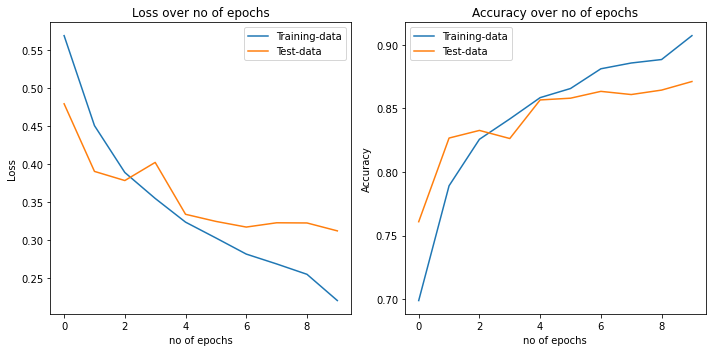

In [134]:
# Plot Training and Testing Loss and Accuracy
plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plot_metrics(ax1, 30, 'loss', 'val_loss', 'no of epochs', 'Loss', 'Loss over no of epochs')
plot_metrics(ax2, 30, 'acc', 'val_acc', 'no of epochs', 'Accuracy', 'Accuracy over no of epochs')
plt.tight_layout()
plt.show()

In [135]:
# Accuracy of the model on Training data
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train, batch_size=128)[1]*100)

147/147 [==============================] - 4s 30ms/step - loss: 0.1510 - acc: 0.9452
Accuracy of the model on Training Data is -  94.52289342880249


In [136]:
# Accuracy of the model on Testing data
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test, batch_size=128)[1]*100)

63/63 [==============================] - 2s 31ms/step - loss: 0.3126 - acc: 0.8711
Accuracy of the model on Testing Data is -  87.10845112800598


In [137]:
# Predictions
pred = (model.predict(X_test) > 0.5).astype("int32")
print(pred[:5])

[[1]
 [0]
 [0]
 [0]
 [0]]


In [138]:
# Classification Report
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.87      0.90      0.89      4486
    Sarcastic       0.87      0.83      0.85      3527

     accuracy                           0.87      8013
    macro avg       0.87      0.87      0.87      8013
 weighted avg       0.87      0.87      0.87      8013



In [139]:
# Confusion Matrix
confusion_matrix(y_test,pred)

array([[4046,  440],
       [ 593, 2934]])

### Conclusion
- With Bidirection LSTM, we are able to get 87% Test Accuracy in 10 epochs.
- The model is slightly overfitting , but we are getting good Precision for both Sarcastic and Non-Sarcastic classes